### YouTube Ranking 시각화

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False      # minus오류 없애는

In [136]:
df = pd.read_csv('data/20230425_유튜브랭킹.csv')
df.head(3)

,순위,카테고리,채널명,구독자수,조회수,비디오
0,1,음악/댄스/가수,BLACKPINK,87300000,30533500000,507
1,2,음악/댄스/가수,BANGTANTV,74500000,20143000000,2188
2,3,음악/댄스/가수,HYBE LABELS,70300000,27323160000,1158


- 구독자수 Top 10 - barh차트로 만들기

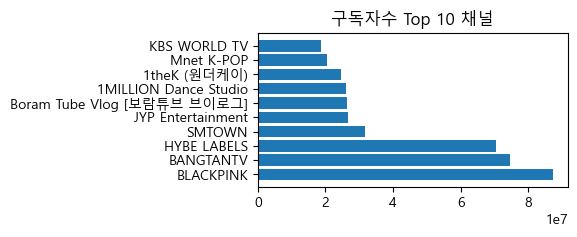

In [137]:
# 오름차순 1)
plt.figure(figsize=(4,2))
plt.barh(df.채널명.head(10), df.구독자수.head(10))
plt.title('구독자수 Top 10 채널');

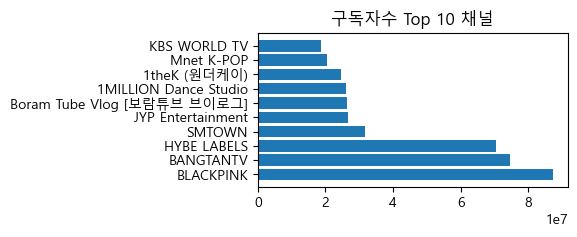

In [140]:
# 오름차순 2)
plt.figure(figsize=(4,2))
plt.barh(df.채널명.head(10), df.구독자수.head(10))
plt.title('구독자수 Top 10 채널');

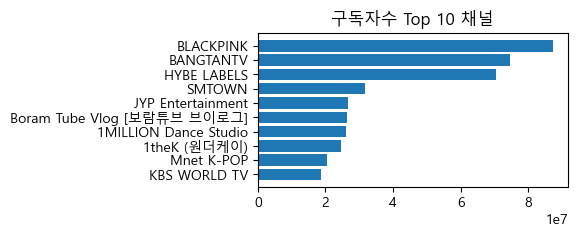

In [159]:
# 내림차순 1)
df1= df.head(10).sort_values(by='구독자수')
plt.figure(figsize=(4,2))
plt.barh(df1.채널명, df1.구독자수)
plt.title('구독자수 Top 10 채널');

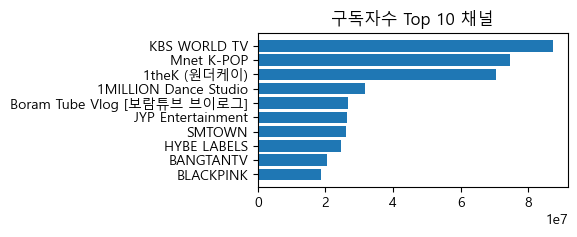

In [161]:
# 내림차순 2) *반례 확인 필요
plt.figure(figsize=(4,2))
plt.barh(df.채널명.head(10), df.구독자수.head(10).sort_values())
plt.title('구독자수 Top 10 채널');

``` seaborn으로 만들기```

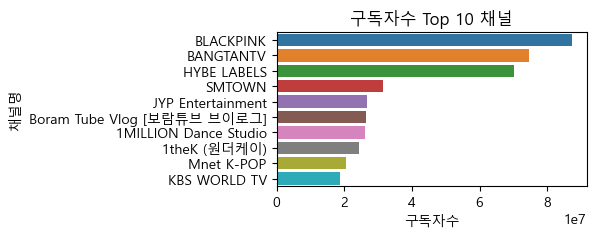

In [141]:
# 구독자수 Top 10
plt.figure(figsize=(4,2))
sns.barplot(y='채널명', x='구독자수', data=df.head(10))
plt.title('구독자수 Top 10 채널');

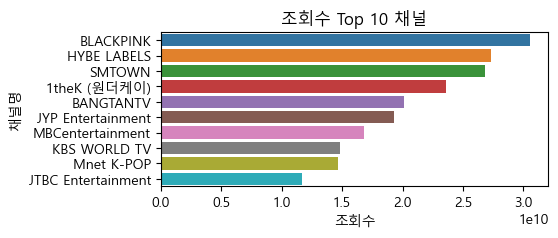

In [167]:
# 조회수 Top 10
df1 = df.sort_values(by='조회수', ascending=False)
plt.figure(figsize=(5,2))
sns.barplot(y='채널명', x='조회수', data=df1.head(10))
plt.title('조회수 Top 10 채널');

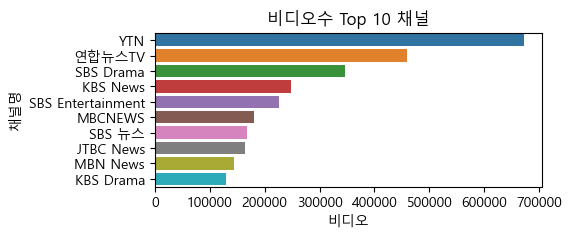

In [162]:
# 비디오 수 Top 10
df2 = df.sort_values(by='비디오', ascending=False)
plt.figure(figsize=(5,2))
sns.barplot(y='채널명', x='비디오', data=df2.head(10))
plt.title('비디오수 Top 10 채널');

- 카테고리별 채널수

In [144]:
# 카테고리별 채널수
df3 = df.카테고리.value_counts().to_frame() # series를 DF로 바꿔줌
df3.head()

,count
카테고리,
미분류,181
음악/댄스/가수,155
키즈/어린이,132
TV/방송,125
음식/요리/레시피,71


In [163]:
df.pivot_table('채널명','카테고리',aggfunc='count').sort_values('채널명',ascending=False).head()

,채널명
카테고리,
미분류,181
음악/댄스/가수,155
키즈/어린이,132
TV/방송,125
음식/요리/레시피,71


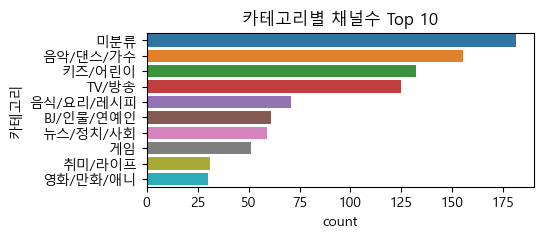

In [165]:
plt.figure(figsize=(5,2))
sns.barplot(y=df3.index[:10], x='count', data=df3.head(10));
plt.title('카테고리별 채널수 Top 10');

- 카테고리별 구독자수 Top 10

In [147]:
df4 = df.pivot_table('구독자수','카테고리', aggfunc='sum').sort_values('구독자수', ascending=False)
df4.head()

,구독자수
카테고리,
음악/댄스/가수,818080000
키즈/어린이,402090000
TV/방송,267760000
미분류,249330000
음식/요리/레시피,215100000


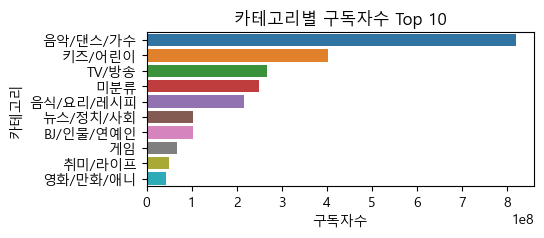

In [166]:
plt.figure(figsize=(5,2))
sns.barplot(y=df4.index[:10], x=df4.구독자수.head(10))  # 'df4.카테고리' -> 안됨
plt.title('카테고리별 구독자수 Top 10');